# Email Spam Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1280,ham,Oh ho. Is this the first time u use these type...,NaN,NaN,NaN
87,ham,Yes I started to send requests to make it but ...,NaN,NaN,NaN
3059,ham,K..k...from tomorrow onwards started ah?,NaN,NaN,NaN
3361,ham,No messages on her phone. I'm holding it now,NaN,NaN,NaN
236,ham,Or ill be a little closer like at the bus stop...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3742,ham,"Nah, Wednesday. When should I bring the mini c..."
1346,ham,Is it ok if I stay the night here? Xavier has ...
4888,ham,"Japanese Proverb: If one Can do it, U too Can ..."
1090,spam,WIN URGENT! Your mobile number has been awarde...
4228,ham,Have you bookedthe hut? And also your time off...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
535,ham,"Good afternoon, my love! How goes that day ? I..."
3175,ham,Havent still waitin as usual... ÌÏ come back s...
618,ham,I come n pick Ì_ up... Come out immediately af...
3661,ham,"What are you doing in langport? Sorry, but I'l..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Missing Values

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

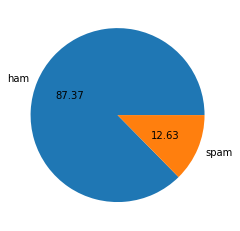

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOURABHBHARDWAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2785,0,Yeah get the unlimited,22,4,1
2455,0,"Abeg, make profit. But its a start. Are you us...",88,22,3
411,0,Cos i want it to be your thing,30,8,1
3994,0,R u in this continent?,22,6,1
4469,0,"Lemme know when I can swing by and pick up, I'...",97,23,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

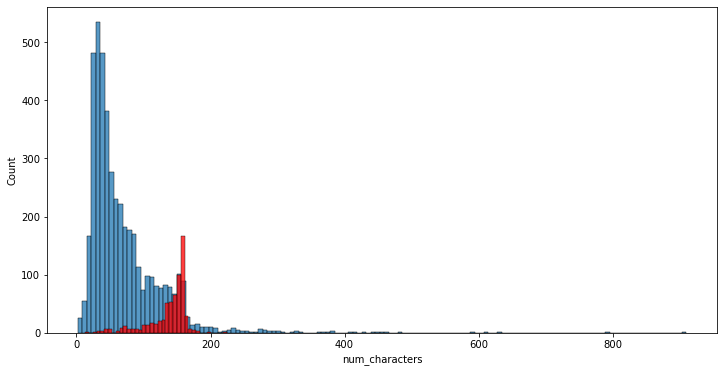

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

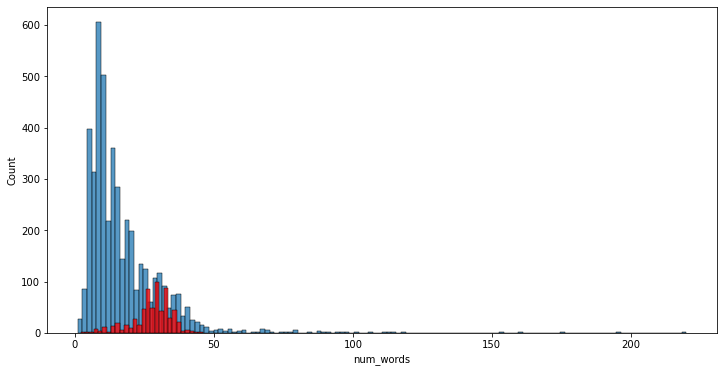

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

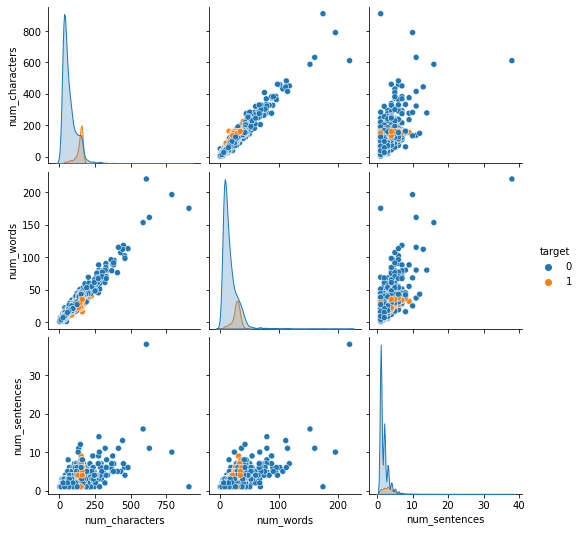

In [35]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

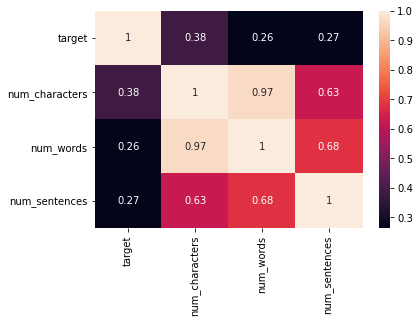

In [36]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import collections
nltk.download('stopwords')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABHBHARDWAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def text_transform(text):
  # conversion to lowercase
  text = text.lower()
  #tokennizing
  text = nltk.word_tokenize(text)
  y = []
  for i in text :
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  # remove stopwords
  for i in text:
    if i not in stopwords.words('english'):
      y.append(i)
  text = y[:]
  y.clear()
  # stemming the texts.
  for i in text :
    y.append(ps.stem(i))
  return " ".join(y)


In [39]:
df['transformed_text'] = df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width = 800,height = 600,min_font_size=10,background_color='white')


In [41]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

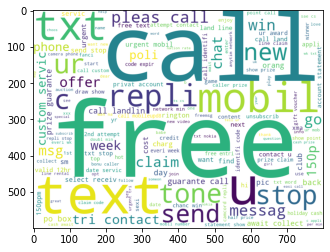

In [42]:
plt.imshow(spam_wc)

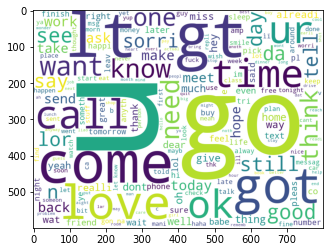

In [43]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

9939

C:\Users\SOURABHBHARDWAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


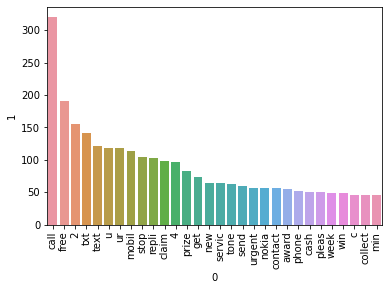

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

We can not build our model on text data so we convert out data into vector using sklearn.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [47]:
X = tv.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

Preparing training and testing data.
where 20% data is test data.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 2)

We are going to test our dataset on following algorithm:<br>
1. Naive Bayes
2. Decision Tree
3. SVM
5. Random Forest
6.Logistic Regression


### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [52]:
y_pred1 = gnb.fit(X_train,y_train).predict(X_test)
gnb_prec=precision_score(y_test,y_pred1)
gnb_acc=accuracy_score(y_test,y_pred1)

In [53]:
y_pred2 = mnb.fit(X_train,y_train).predict(X_test)
mnb_prec = precision_score(y_test,y_pred2)
mnb_acc=accuracy_score(y_test,y_pred2)

In [54]:
y_pred3 = bnb.fit(X_train,y_train).predict(X_test)
bnb_prec = precision_score(y_test,y_pred3)
bnb_acc=accuracy_score(y_test,y_pred3)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [56]:
lr_pred = lr.fit(X_train,y_train).predict(X_test)
lr_prec=precision_score(y_test,lr_pred)
lr_acc=accuracy_score(y_test,lr_pred)

### Decision Tree

In [57]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [58]:
dt_pred = dt.fit(X_train,y_train).predict(X_test)
dt_prec = precision_score(y_test,dt_pred)
dt_acc = accuracy_score(y_test,dt_pred)

### Support Vector Machine (SVM)

In [59]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_prec = precision_score(y_test,y_pred)
svm_acc=accuracy_score(y_test,y_pred)



### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)


In [61]:
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_prec = precision_score(y_test,rf_pred)
rf_acc = accuracy_score(y_test,rf_pred)


### Result of Different Algorithms

In [62]:
acc_prec_data = {'Algorithm':['Gaussian NB','Bernoulli NB','Multinomial NB','Logistic Regression','SVM','Decision Tree','Random Forest'],
            'Accuracy':[gnb_acc,bnb_acc,mnb_acc,lr_acc,svm_acc,dt_acc,rf_acc],
            'Precision':[gnb_prec,bnb_prec,mnb_prec,lr_prec,svm_prec,dt_prec,rf_prec]}
acc_prec_df = pd.DataFrame(acc_prec_data)
acc_prec_df

,Algorithm,Accuracy,Precision
0,Gaussian NB,0.876209,0.523148
1,Bernoulli NB,0.970019,0.973451
2,Multinomial NB,0.959381,1.000000
3,Logistic Regression,0.946809,0.988235
4,SVM,0.966151,0.981308
5,Decision Tree,0.954545,0.827338
6,Random Forest,0.972921,0.991071


In above result we can see that Multinomial Naive Bayes and Random Forest Algorithm has highest precision but Multinomial Naive Bayes is very fast than Random Forest. So we will use Multinomial for our Model.

### Modeling using Multinomial Naive Bayes

In [118]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))